<a href="https://colab.research.google.com/github/gplinkage/Data-Science-ML-AI/blob/main/Projects/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brain tumors, constituting the majority of primary Central Nervous System (CNS) tumors, affect about 11,700 individuals annually, with a 5-year survival rate of 34-36% for cancerous brain or CNS tumors. To enhance patient life expectancy, effective treatment and precise diagnostics, particularly using Magnetic Resonance Imaging (MRI), are crucial. Manual examination of MRI data is error-prone due to the complexities of brain tumors.

Automated classification using Machine Learning (ML) and Artificial Intelligence (AI), specifically Deep Learning Algorithms like Convolutional Neural Network (CNN), Artificial Neural Network (ANN), and Transfer Learning (TL), consistently demonstrates higher accuracy than manual methods. A proposed system leveraging these techniques holds potential to benefit doctors globally by detecting and classifying brain tumors.

Brain tumors' inherent complexities, including size and location abnormalities, pose challenges to understanding their nature. The shortage of skilled Neurosurgeons for MRI analysis, especially in developing countries, impedes timely report generation. An automated Cloud-based system using CNN and TL emerges as a viable solution to expedite the diagnostic process in regions with a shortage of specialized medical expertise.

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
# Loading data and Image Augmentation
import os
from PIL import Image

# Path to the folder containing brain tumor images
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'

# List comprehension to get all image files with a '.jpg' extension from the Training subfolder
image_files = [file for file in os.listdir('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training') if file.endswith('.jpg')]

# Iterate through each image file
for file in image_files:
    # Construct the full file path for the current image
    file_path = os.path.join('/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training', file)

    # Open the image using the PIL library
    image = Image.open(file_path)

    # Resize the image to dimensions 256x256
    resized_image = image.resize((256, 256))

    # Display the resized image
    resized_image.show()


In [ ]:
# Loading data and Image Augmentation

from IPython.display import display

# Path to the folder containing brain tumor images
image_folder_path = '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset'

# List comprehension to get all image files with a '.jpg' or '.png' extension from the specified folder
image_files = [file for file in os.listdir(image_folder_path) if file.endswith('.jpg') or file.endswith('.png')]

# Iterate through each image file
for file in image_files:
    # Construct the full file path for the current image
    file_path = os.path.join(image_folder_path, file)

    # Open the image using the PIL library
    image = Image.open(file_path)

    # Display the image using IPython's display function
    display(image)

In [ ]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow training images in batches using the directory structure
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Training',
    batch_size=30,            # Number of samples in each batch
    target_size=(150, 150)     # Resizes images to (150, 150) pixels
)

# Rescaling for the validation set (no data augmentation for validation)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow validation images in batches using the directory structure
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data Science/All Raw-Data/Brain Tumor dataset/Testing',
    batch_size=30,            # Number of samples in each batch
    target_size=(150, 150)     # Resizes images to (150, 150) pixels
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
labels_2=['glioma','meningioma','notumor','pituitary']

In [ ]:
# Get the labels from the validation generator
labels = validation_generator.labels

# Create a Pandas Series from the labels
labels_series = pd.Series(labels)

# Count the occurrences of each label in the validation set
value_counts = labels_series.value_counts()

# Print the distribution of labels
print(value_counts)


1    115
2    105
0    100
3     74
dtype: int64


In [ ]:
# Get the labels from the training generator
labels = train_generator.labels

# Create a Pandas Series from the labels
labels_series = pd.Series(labels)

# Count the occurrences of each label in the training set
value_counts = labels_series.value_counts()

# Print the distribution of labels in the training set
print(value_counts)


3    827
0    826
1    822
2    395
dtype: int64


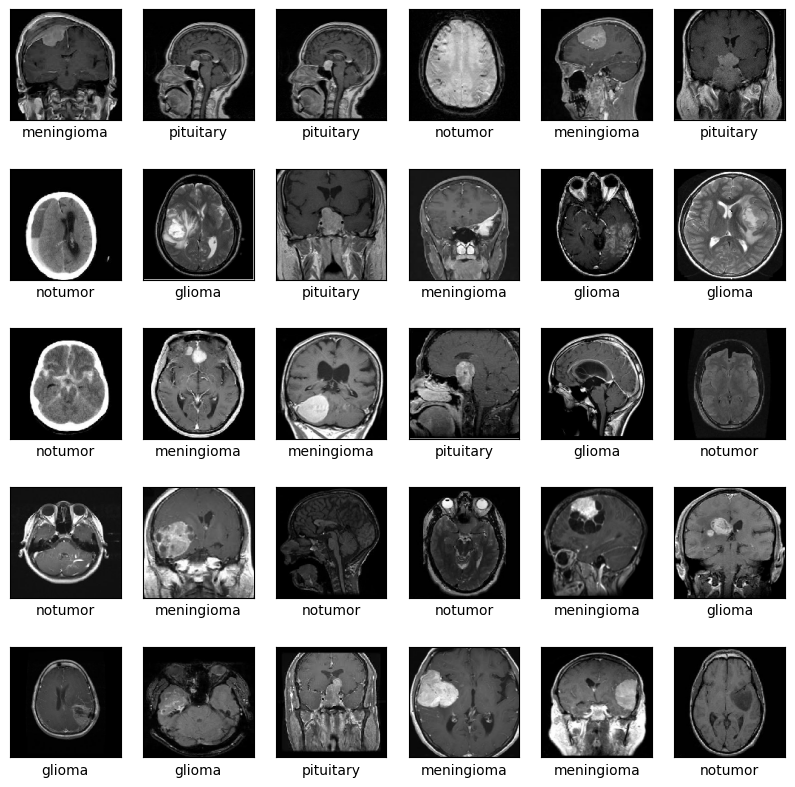

In [ ]:
# Display some images
i = 0
batch_size = validation_generator.batch_size

# Check if the batch index is valid
if i < len(validation_generator):
    # Get a batch of images and labels from the validation generator
    batch_images, batch_labels = validation_generator[i]

    # Create a plot to display the images with their class labels
    plt.figure(figsize=(10, 10))
    for idx in range(batch_size):
        # Configure the subplot layout
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Display the image
        plt.imshow(batch_images[idx])

        # Get the predicted class index and corresponding class name
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]

        # Display the class name as xlabel
        plt.xlabel(class_name)

        # Break if it's the last image in the batch
        if idx >= batch_size - 1:
            break
else:
    # Print a message for an invalid batch index
    print("Invalid batch index!")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building the CNN model
model = Sequential()

# Convolutional layer with 50 filters, kernel size of 5x5, and ReLU activation
model.add(Conv2D(filters=50, kernel_size=5, strides=1, activation='relu', input_shape=(150, 150, 3)))

# Max pooling layer with pool size of 2x2 and strides of 2
model.add(MaxPooling2D(pool_size=2, strides=2))

# Convolutional layer with 100 filters, kernel size of 5x5, and ReLU activation
model.add(Conv2D(filters=100, kernel_size=5, strides=1, activation='relu'))

# Max pooling layer with pool size of 2x2 and strides of 2
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten layer to convert 2D feature maps to a vector
model.add(Flatten())

# Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Dense (fully connected) layer with 150 units and ReLU activation
model.add(Dense(150, activation='relu'))

# Output layer with 4 units (for 4 classes) and softmax activation for multi-class classification
model.add(Dense(4, activation='softmax'))

# Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 50)      3800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 100)       125100    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 115600)            0         
                                                                 
 dropout_1 (Dropout)         (None, 115600)           

In [ ]:
# Training Model
history=model.fit(train_generator, epochs=10,validation_data=validation_generator)

Epoch 1/10
96/96 [==============================] - 781s 8s/step - loss: 0.9568 - accuracy: 0.6258 - val_loss: 1.5914 - val_accuracy: 0.4670
Epoch 2/10
96/96 [==============================] - 11s 116ms/step - loss: 0.4596 - accuracy: 0.8206 - val_loss: 2.2953 - val_accuracy: 0.5685
Epoch 3/10
96/96 [==============================] - 11s 115ms/step - loss: 0.3050 - accuracy: 0.8801 - val_loss: 2.7213 - val_accuracy: 0.6066
Epoch 4/10
96/96 [==============================] - 11s 117ms/step - loss: 0.2224 - accuracy: 0.9233 - val_loss: 3.4990 - val_accuracy: 0.7107
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.1213 - accuracy: 0.9575 - val_loss: 3.0776 - val_accuracy: 0.7386
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.0894 - accuracy: 0.9659 - val_loss: 3.2821 - val_accuracy: 0.7411
Epoch 7/10
96/96 [==============================] - 10s 105ms/step - loss: 0.0652 - accuracy: 0.9767 - val_loss: 4.3938 - val_accuracy: 0.7437
E

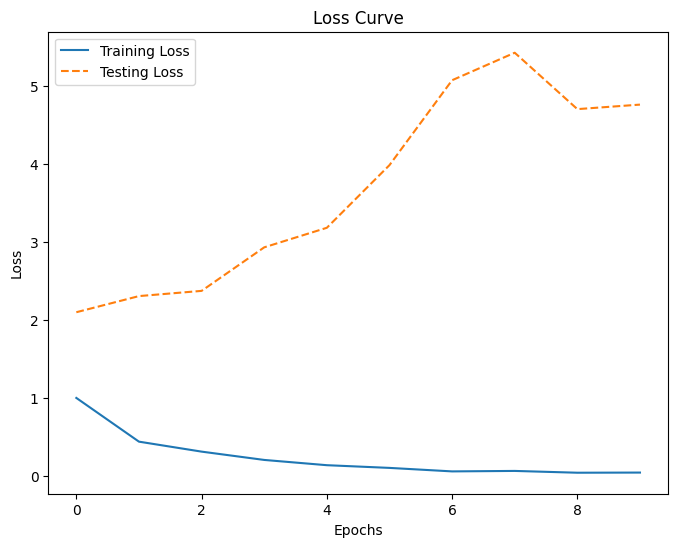

In [ ]:
# Plotting the Loss Curves

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Plot the training loss curve
plt.plot(history.history['loss'])

# Plot the testing loss curve with a dashed line
plt.plot(history.history['val_loss'], ls='--')

# Add legend for better interpretation
plt.legend(['Training Loss', 'Testing Loss'])

# Set labels for the x and y axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the title of the plot
plt.title("Loss Curve")

# Display the plot
plt.show()


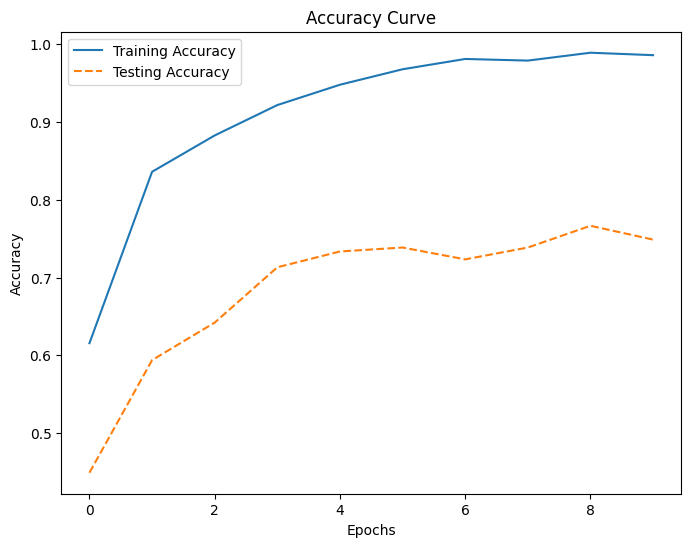

In [ ]:
# Plotting the Accuracy Curves

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Plot the training accuracy curve
plt.plot(history.history['accuracy'])

# Plot the testing accuracy curve with a dashed line
plt.plot(history.history['val_accuracy'], ls='--')

# Add legend for better interpretation
plt.legend(['Training Accuracy', 'Testing Accuracy'])

# Set labels for the x and y axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title of the plot
plt.title("Accuracy Curve")

# Display the plot
plt.show()


In [ ]:
# Model Evaluation
model.evaluate(validation_generator)

14/14 [==============================] - 2s 109ms/step - loss: 4.7632 - accuracy: 0.7487


[4.763237953186035, 0.7487309575080872]

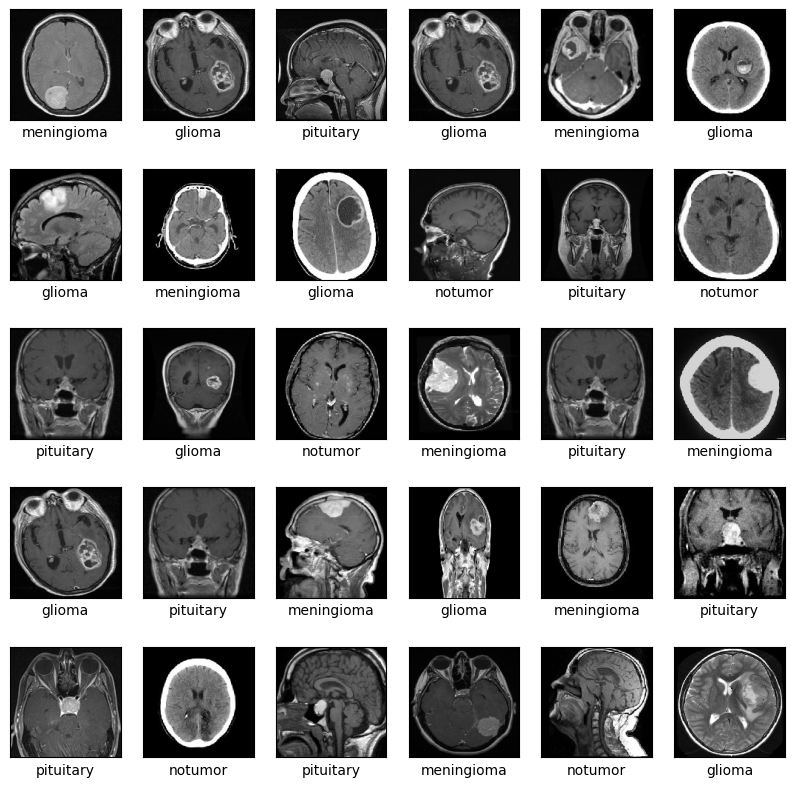

In [ ]:
# Plotting the Accuracy Curves

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Plot the training accuracy curve
plt.plot(history.history['accuracy'])

# Plot the testing accuracy curve with a dashed line
plt.plot(history.history['val_accuracy'], ls='--')

# Add legend for better interpretation
plt.legend(['Training Accuracy', 'Testing Accuracy'])

# Set labels for the x and y axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the title of the plot
plt.title("Accuracy Curve")

# Display the plot
plt.show()
